In [1]:
#importing the digits dataset
from sklearn.datasets import load_digits
X,y = load_digits(return_X_y=True)

In [2]:
#import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [3]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,201,10):
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,random_state=0),
                                  X,y,cv=4).mean())

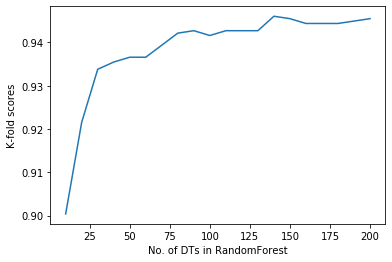

In [4]:
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

In [5]:
scores

[0.9003909923286315,
 0.9215404602821085,
 0.9337812422667657,
 0.9354553328384063,
 0.9365701559020044,
 0.9365639693145261,
 0.9393479336797822,
 0.9421306607275428,
 0.9426924028705765,
 0.9415788171244741,
 0.9426924028705765,
 0.9426924028705765,
 0.942691165553081,
 0.9460282108389013,
 0.9454701806483543,
 0.9443590695372432,
 0.9443590695372432,
 0.9443578322197477,
 0.9449146250927989,
 0.9454701806483543]

In [6]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_estimators': [80,90,100],
            'max_depth': [12,14,16]
        }
model = GridSearchCV(RandomForestClassifier(random_state=0), params,cv=4)
model.fit(X,y)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [7]:
model.best_params_

{'max_depth': 14, 'n_estimators': 90}

In [8]:
model.best_score_

0.9460319227913883

In [9]:
best_model = model.best_estimator_

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [11]:
best_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
y_pred = best_model.predict(X_test)

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      0.98      0.99        44
           3       0.92      1.00      0.96        45
           4       1.00      0.97      0.99        38
           5       1.00      0.98      0.99        48
           6       1.00      1.00      1.00        52
           7       0.96      1.00      0.98        48
           8       1.00      0.94      0.97        48
           9       0.98      0.96      0.97        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



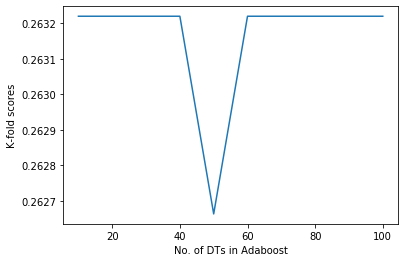

In [19]:
from sklearn.ensemble import AdaBoostClassifier

#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(AdaBoostClassifier(n_estimators=i,random_state=0),
                                  X,y,cv=4).mean())
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [70,80,90,100],
            'base_estimator': [DecisionTreeClassifier(max_depth=9,random_state=0),
                               DecisionTreeClassifier(max_depth=10,random_state=0),
                               DecisionTreeClassifier(max_depth=11,random_state=0)]
        }
model = GridSearchCV(AdaBoostClassifier(random_state=0), params,cv=4)
model.fit(X,y)

GridSearchCV(cv=4, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=0),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight=None,
                                                                   criterion='gini',
                                                                   max_depth=9,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_dec...
                                                               

In [28]:
model.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=10, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'),
 'n_estimators': 90}

In [29]:
model.best_score_

0.9582652808710714

From the above experiments, Adaboost is slightly better for the current dataset with 4-fold score of 95.8% accuracy than RandomForest which has 94.6% 4-fold accuracy. The hyper-parameter tuning using Gridsearch shows that both RandomForest and Adaboost using Decision needs similar number of DTs in their ensemble to give the best score. 